## Задача 2 - Дрва на одлучување и Наивен Баесов класификатор

Дадени се податоци за слетување на вселенско летало. Последната колона `Landing` го кажува начинот на кој е слетано леталото, автоматски или рачно. Оваа колона е излезната колона.

__2.1__: Нацртајте го дрвото на одлучување.

Дадени се податоци за ново слетување.
*  Stability - stab
*  Wind - head
*  Magnitude - low
*  Visibility - yes

__2.2__: Дали летатото да користи автоматски или рачен начин на слетување? Што вели дрвото на одлучување, а што вели наивниот Баесов класификатор?

__2.3__: Накратко опишете ја постапката по која постапивте за да го создадете дрвото на одлучување.

__2.4__: Зошто наивниот Беасов алгоритам се нарекува "наивен", а зошто "Баесов"?
* наивен затоа што претпоставува дека сите колони и редови во табелата се независни, односно, веројатноста на одредена карактеристика дека е независна од веројатностите на други карактеристики, а Баесов затоа што е заснован на Баесовата теорема која ја искажува веројатноста на некој настан/хипотеза врз основа на претходно знаење

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df = pd.read_csv('data/shuttle-landing-control.data')
df

,Stability,Wind,Magnitude,Visibility,Landing
0,stab,head,low,no,auto
1,xstab,tail,low,yes,manual
2,stab,tail,low,yes,manual
3,xstab,head,medium,yes,manual
4,stab,head,low,yes,auto
5,stab,tail,medium,yes,auto
6,stab,head,medium,yes,auto
7,stab,head,medium,no,manual


In [12]:
x=df.drop(columns='Landing')
y=df['Landing']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=24)

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
clf =MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=17)

In [19]:
clf.fit(x_train, y_train)

ValueError: could not convert string to float: 'stab'

In [ ]:
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

In [ ]:
x_test1=['stab','head','low','yes']
table=x_test1
y_predict =  clf.predict(x_test1)
table['prediction']=y_predict
table

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

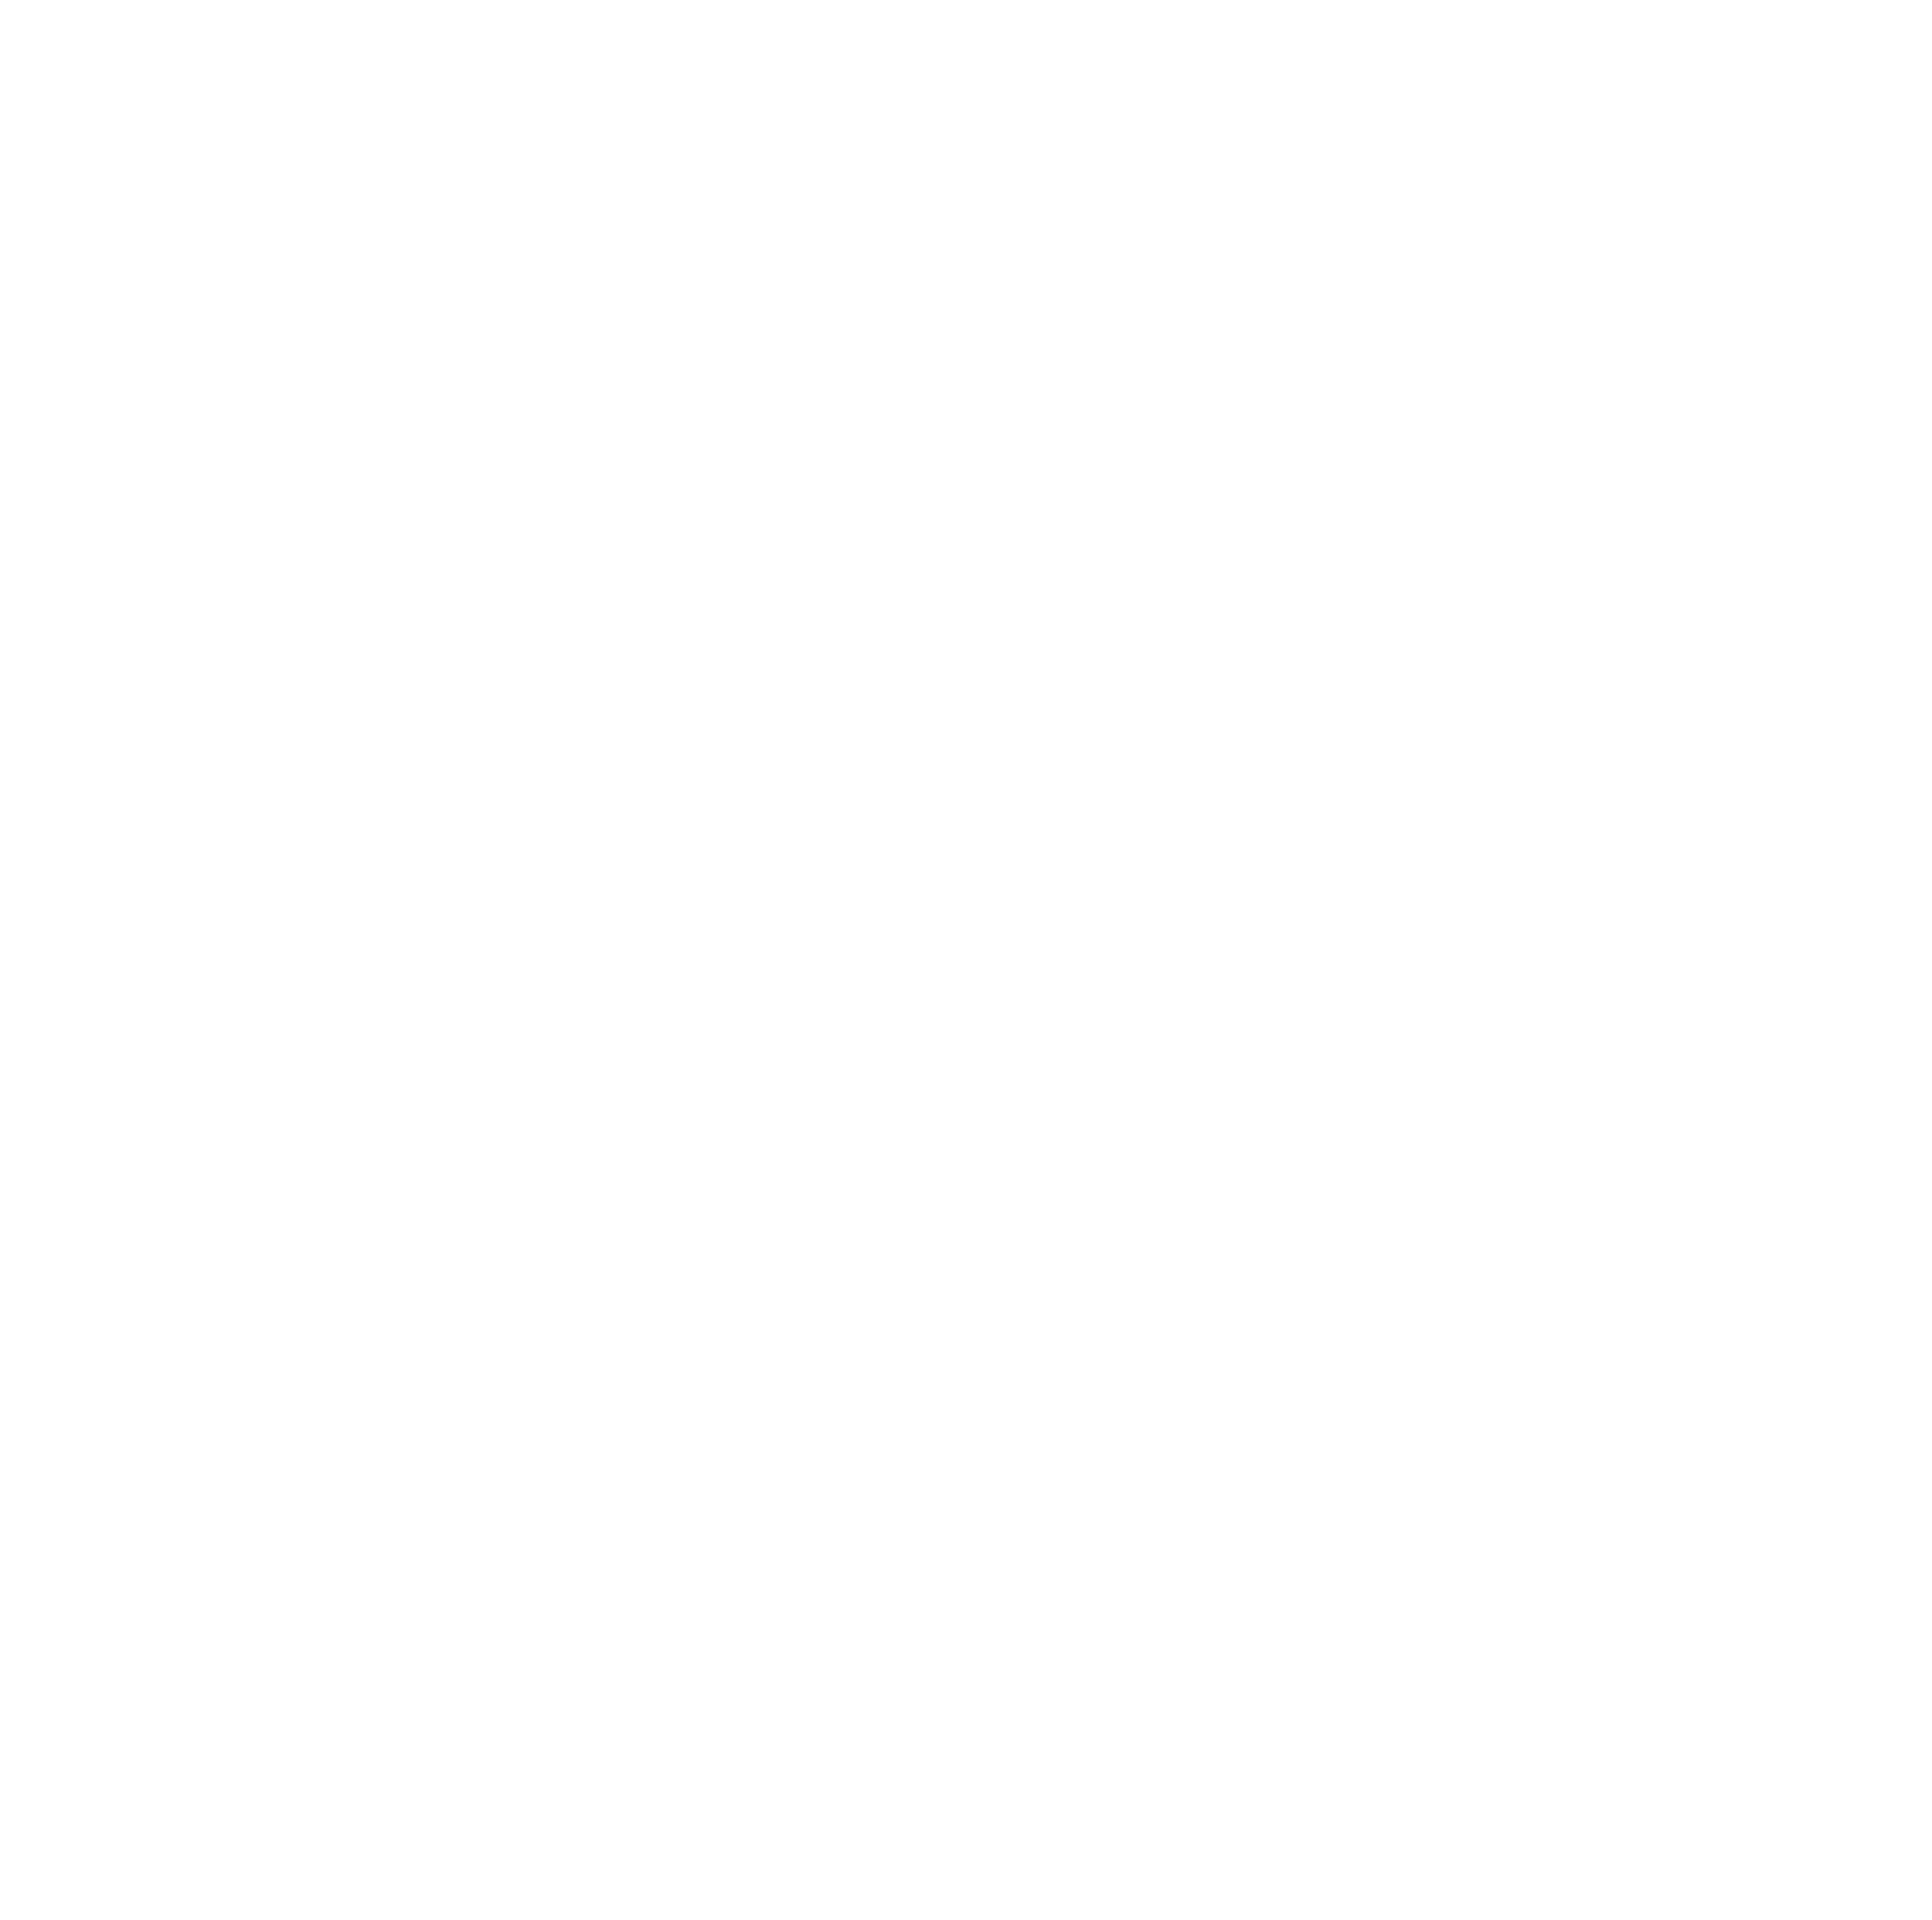

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 30))
tree.plot_tree(clf, fontsize=20, feature_names=x.columns, filled = True, class_names=['auto', 'manual'])
plt.show()

In [18]:
x_test1=['stab','head','low','yes']
y_p = dtree.predict(x_test1)
y_p
# ako sakame da go stavime vo tabela
#final = x_test1
#final['predicted']=y_p

/home/melanicvetkovska/miniconda3/envs/mel/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'stab'

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [21]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1e-3)),
])

In [22]:
clf.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [4, 5]

In [23]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.